## Observations and Insights 

#OBSERVATIONS

1. An equal number of female and male mice were treated in this study.
2. The median size of the tumor volume for the mice treated with tree of the most promising drugs are significantly smaller than the median size of the tumor for mice treated with other drug regimens. This is true for 'Capomulin', 'Ramicane', and 'Ceftamin'.
3. There seems to be a tendency to have more datapoints for mice treated with Ramicane and Capomulin, which could be an indication of longer survival rate. 
4. Most mice treated with the four most promising drug regimens seem to show similar results in terms of final tumor volume with only one possible outlier on the lower boundry for Infubinol.
5. Mouse "s185" which was treated with Capomulin showed a clear sign of reduction in tumor volume throughout the curse of the study. This could be indication of the effectiveness of the treatment. 
6. There is a strong possitive correlation between the average weight of the mouse and the average tumor volume for the mice treated with Capomulin. 




In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
totalresults_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

In [53]:
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [56]:
study_results.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [4]:
totalresults_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the DataFrame.
nr_mice = totalresults_df['Mouse ID'].nunique()
nr_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice1 = totalresults_df.loc[totalresults_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicated_mice1

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = totalresults_df[totalresults_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = totalresults_df.loc[totalresults_df['Mouse ID'] != 'g989']
clean_mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
nr_mice_new = clean_mice_data['Mouse ID'].nunique()
nr_mice_new

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_mice_data.groupby('Drug Regimen')

mean_TumorVolume = drug_regimen['Tumor Volume (mm3)'].mean()

median_TumorVolume = drug_regimen['Tumor Volume (mm3)'].median()

variance_TumorVolume = drug_regimen['Tumor Volume (mm3)'].var()

stdv_TumorVolume = drug_regimen['Tumor Volume (mm3)'].std()

sem_TumorVolume = drug_regimen['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({
    'Mean' : mean_TumorVolume,
    'Median' : median_TumorVolume,
    'Variance' : variance_TumorVolume,
    'Standard deviation' : stdv_TumorVolume,
    'SEM': sem_TumorVolume
})

summary_stats
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_alt = clean_mice_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem']})
summary_stats_alt
# This method produces everything in a single groupby function.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

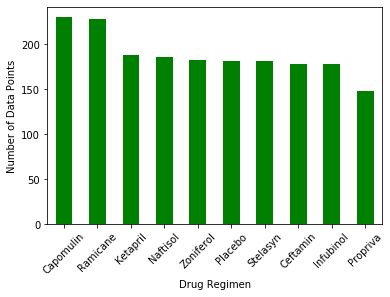

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
counts = clean_mice_data['Drug Regimen'].value_counts()
counts.plot(kind="bar", color='green')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points")
plt.show()

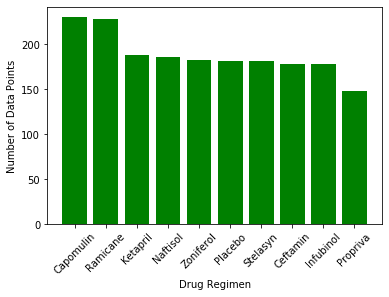

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
counts = clean_mice_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values, color='green')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points")
plt.show()

## Pie Plots

Text(0, 0.5, '')

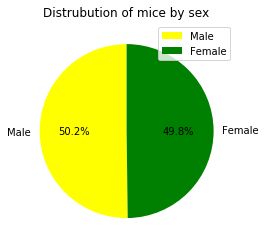

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
values = mouse_metadata['Sex'].value_counts()
colors = ['yellow','green']
values.plot(kind= 'pie', startangle=90, colors = colors, autopct='%1.1f%%')
plt.title('Distrubution of mice by sex')
plt.legend(clean_mice_data['Sex'].unique())
plt.ylabel('')

<function matplotlib.pyplot.show(*args, **kw)>

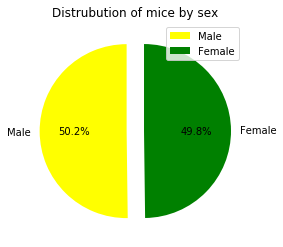

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = mouse_metadata['Sex'].value_counts()
colors = ['yellow','green']
explode = [0.1,0.1]
plt.pie(values.values, labels= values.index.values, explode = explode, startangle=90, colors = colors, autopct='%1.1f%%')
plt.title('Distrubution of mice by sex')
plt.legend(clean_mice_data['Sex'].unique())
plt.show

## Quartiles, Outliers and Boxplots

In [16]:
#Identifying the four most promising treatment regimens by the smallest mean or median in Total Tumor Volume (Not necessary)
top_promising_regimen = summary_stats.sort_values('Mean', ascending=True)
four_promising_regimen = top_promising_regimen.head(4)
four_promising_regimen

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


In [14]:
#Creating the new dataframe with the four most promising treatment regimens provided (Capomulin, Ramicane, Infubinol, and Ceftamin.)
df1 = clean_mice_data.loc[clean_mice_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])] 
df1.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volume_bymouse = df1.groupby('Mouse ID').max()
tumor_volume_bymouse = tumor_volume_bymouse.reset_index()
clean_tumor_volume = tumor_volume_bymouse[['Mouse ID', 'Timepoint']].merge(clean_mice_data, how= 'left', on=['Mouse ID', 'Timepoint'])
clean_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [19]:
#Creating a new dataframe for each of the promising Drug Regimens
df_Infubinol = clean_tumor_volume.loc[clean_tumor_volume['Drug Regimen'] == 'Infubinol']
df_Ramicane = clean_tumor_volume.loc[clean_tumor_volume['Drug Regimen'] == 'Ramicane']
df_Capomulin = clean_tumor_volume.loc[clean_tumor_volume['Drug Regimen'] == 'Capomulin']
df_Ceftamin = clean_tumor_volume.loc[clean_tumor_volume['Drug Regimen'] == 'Ceftamin']
df_Ceftamin.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
2,a275,45,Ceftamin,Female,20,28,62.999356,3
10,b447,0,Ceftamin,Male,2,30,45.000000,0
11,b487,25,Ceftamin,Female,6,28,56.057749,1
13,b759,30,Ceftamin,Female,12,25,55.742829,1
23,f436,15,Ceftamin,Female,3,25,48.722078,2


In [20]:
#generating the series for the tumor volume for each treatment regimen
volume_Infubinol = df_Infubinol['Tumor Volume (mm3)']
volume_Ramicane = df_Ramicane['Tumor Volume (mm3)']
volume_Capomulin = df_Capomulin['Tumor Volume (mm3)']
volume_Ceftamin = df_Ceftamin['Tumor Volume (mm3)']

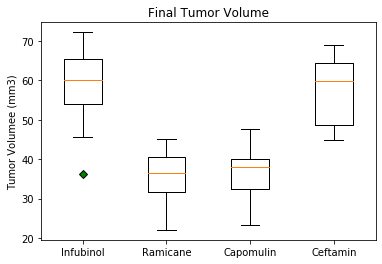

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Total_volume = [volume_Infubinol, volume_Ramicane, volume_Capomulin, volume_Ceftamin]
labels = ['Infubinol','Ramicane','Capomulin', 'Ceftamin']
fig1, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volumee (mm3)')
labels=labels
ax1.boxplot(Total_volume, labels=labels, flierprops=green_diamond)
plt.show()

In [22]:
#Getting the quartiles for Infubinol
quartiles_In = volume_Infubinol.quantile([.25,.5,.75])
lowerq_In = quartiles_In[0.25]
upperq_In = quartiles_In[0.75]
iqr_In = upperq_In-lowerq_In

In [19]:
drug_regimens = ['Infubinol','Ramicane','Capomulin', 'Ceftamin']

def drug_regimen_stats(drug_regimens):
    for drug in drug_regimens:
        drug_tumor_volume = clean_tumor_volume.loc[clean_tumor_volume['Drug Regimen'] == drug]
        
        tumor_volume = drug_tumor_volume['Tumor Volume (mm3)']
        quartiles = tumor_volume.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        
        print(f"iqr_{drug}: {iqr}")

In [20]:
drug_regimen_stats(drug_regimens)

iqr_Infubinol: 11.477135160000003
iqr_Ramicane: 9.098536719999998
iqr_Capomulin: 7.781863460000004
iqr_Ceftamin: 15.577752179999997


In [23]:
#Getting the quartiles for Ramicane
quartiles_Ra = volume_Ramicane.quantile([.25,.5,.75])
lowerq_Ra = quartiles_Ra[0.25]
upperq_Ra = quartiles_Ra[0.75]
iqr_Ra = upperq_Ra-lowerq_Ra

In [24]:
#Getting the quartiles for Capomulin
quartiles_Ca = volume_Capomulin.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]
iqr_Ca = upperq_Ca-lowerq_Ca

In [25]:
#Getting the quartiles for Ceftamin
quartiles_Ce = volume_Ceftamin.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce

In [26]:
#Optional: Printing the values for the quartiles and the lower and upper bound for each treatment regimen
print(f"The lower quartile of Tumor Volume for Infubinol Drug is: {lowerq_In}")
print(f"The upper quartile of Tumor Volume for Infubinol Drug is: {upperq_In}")
print(f"The interquartile range of Tumor Volume for Infubinol Drugis: {iqr_In}")
print(f"The the median of Tumor Volume for Infubinol Drug is: {quartiles_In[0.5]} ")

lower_bound_In = lowerq_In - (1.5*iqr_In)
upper_bound_In = upperq_In + (1.5*iqr_In)
print(f"Values below {lower_bound_In} could be outliers.")
print(f"Values above {upper_bound_In} could be outliers.")

print('----------------------------------------------------------------------')
print(f"The lower quartile of Tumor Volume for Ramicane Drug is: {lowerq_Ra}")
print(f"The upper quartile of Tumor Volume for Ramicane Drug is: {upperq_Ra}")
print(f"The interquartile range of Tumor Volume is: {iqr_Ra}")
print(f"The the median of Tumor Volume for Ramicane Drug is: {quartiles_Ra[0.5]} ")

lower_bound_Ra = lowerq_Ra - (1.5*iqr_Ra)
upper_bound_Ra = upperq_Ra + (1.5*iqr_Ra)
print(f"Values below {lower_bound_Ra} could be outliers.")
print(f"Values above {upper_bound_Ra} could be outliers.")

print('----------------------------------------------------------------------')
print(f"The lower quartile of Tumor Volume for Capomulin Drug is: {lowerq_Ca}")
print(f"The upper quartile of Tumor Volume for Capomulin Drug is: {upperq_Ca}")
print(f"The interquartile range of Tumor Volume for Capomulin is: {iqr_Ca}")
print(f"The the median of Tumor Volume for Capomulin Drug is: {quartiles_Ca[0.5]} ")

lower_bound_Ca = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_Ca = upperq_Ca + (1.5*iqr_Ca)
print(f"Values below {lower_bound_Ca} could be outliers.")
print(f"Values above {upper_bound_Ca} could be outliers.")

print('----------------------------------------------------------------------')
print(f"The lower quartile of Tumor Volume for Ceftamin Drug is: {lowerq_Ce}")
print(f"The upper quartile of Tumor Volume for Ceftamin Drug is: {upperq_Ce}")
print(f"The interquartile range of Tumor Volume for Ceftamin Drug is: {iqr_Ce}")
print(f"The the median of Tumor Volume for Ramicane Drug is: {quartiles_Ce[0.5]} ")

lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)
print(f"Values below {lower_bound_Ce} could be outliers.")
print(f"Values above {upper_bound_Ce} could be outliers.")

The lower quartile of Tumor Volume for Infubinol Drug is: 54.04860769
The upper quartile of Tumor Volume for Infubinol Drug is: 65.52574285
The interquartile range of Tumor Volume for Infubinol Drugis: 11.477135160000003
The the median of Tumor Volume for Infubinol Drug is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
----------------------------------------------------------------------
The lower quartile of Tumor Volume for Ramicane Drug is: 31.56046955
The upper quartile of Tumor Volume for Ramicane Drug is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume for Ramicane Drug is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
----------------------------------------------------------------------
The lower quartile of Tumor Volume for Capomulin Drug is: 32.37735684
The upper quartile of Tumor Volume for 

In [51]:
#Getting the specific potential outliers for each drug regimen 
outliers_Infubinol = volume_Infubinol.loc[(volume_Infubinol <= lower_bound_In) | (volume_Infubinol >= upper_bound_In)] 
outliers_Ramicane = volume_Ramicane.loc[(volume_Ramicane <= lower_bound_Ra) | (volume_Ramicane >=  upper_bound_Ra)] 
outliers_Capomulin = volume_Capomulin.loc[(volume_Capomulin <= lower_bound_Ca) | (volume_Capomulin >=  upper_bound_Ca)] 
outliers_Ceftamin = volume_Ceftamin.loc[(volume_Ceftamin <= lower_bound_Ce) | (volume_Ceftamin >=  upper_bound_Ce)] 

#Getting more info regarding the outlier
outliers_Infubinol2 = df_Infubinol.loc[(df_Infubinol['Tumor Volume (mm3)'] <= 36.832904949) | (df_Infubinol['Tumor Volume (mm3)'] >= 82.74144559)] 

In [50]:
#Printing the potential outliers
print(f" These values could be outliers for Infubinol: {outliers_Infubinol}")
print(f" These values could be outliers for Ramicane: {outliers_Ramicane}")
print(f" These values could be outliers for Capomulin: {outliers_Capomulin}")
print(f" These values could be outliers for Ceftamin: {outliers_Ceftamin}")

 These values could be outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
 These values could be outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
 These values could be outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
 These values could be outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

In [31]:
#Generating a new dataframe that contains mice treated with Capomulin and selecting a sigle mouse out of those
Capomulin_mice_df = clean_mice_data.loc[clean_mice_data['Drug Regimen'] == 'Capomulin']
Capomulin_mouse_df = Capomulin_mice_df.loc[Capomulin_mice_df['Mouse ID'] == 's185'] 

Text(0, 0.5, 'Tumor Volume (mm3)')

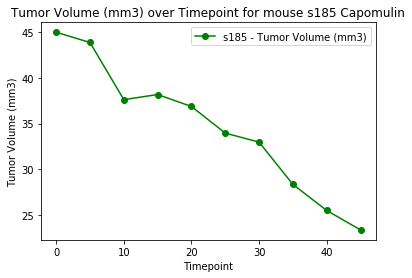

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
xaxis = Capomulin_mouse_df['Timepoint']
yaxis = Capomulin_mouse_df['Tumor Volume (mm3)']
plt.plot(xaxis , yaxis, color="green", marker = 'o', label='s185 - Tumor Volume (mm3)')

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title('Tumor Volume (mm3) over Timepoint for mouse s185 Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

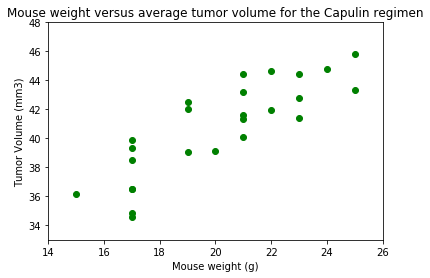

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capuling_mice_grouped = Capomulin_mice_df.groupby('Mouse ID')
xaxis2 = capuling_mice_grouped['Weight (g)'].mean()
yaxis2 = capuling_mice_grouped['Tumor Volume (mm3)'].mean()

plt.scatter(xaxis2, yaxis2, marker="o", color="green")
plt.title('Mouse weight versus average tumor volume for the Capulin regimen')
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(33,48)
plt.xlim(14,26)
plt.show()

In [34]:
Capomulin_mice_df.nunique()

Mouse ID               25
Drug Regimen            1
Sex                     2
Age_months             15
Weight (g)              9
Timepoint              10
Tumor Volume (mm3)    206
Metastatic Sites        4
dtype: int64

## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(xaxis2,yaxis2)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


The r-squared is: 0.7088568047708717


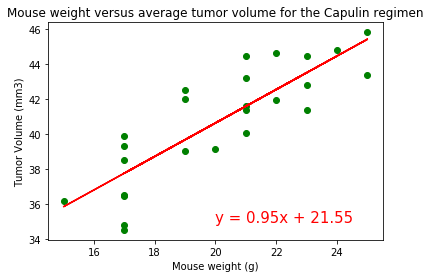

In [58]:
#Calculatin linear regression and plotting it in the scatter chart
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis2, yaxis2)
regress_values = xaxis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis2, yaxis2, marker='o', color = 'green')
plt.plot(xaxis2,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title('Mouse weight versus average tumor volume for the Capulin regimen')
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()